## THE EMNIST DATASET 

The EMNIST dataset is a set of handwritten character digits derived from the NIST Special Database 19 and converted to a 28x28 pixel image format and dataset structure that directly matches the MNIST dataset .

In [1]:
import tensorflow as tf
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm

In [2]:
!pip install emnist
!pip install wandb -qqq
import wandb

In [3]:
wandb.login()

wandb: Currently logged in as: anandkarunan (use `wandb login --relogin` to force relogin)


True

In [4]:
from emnist import list_datasets
list_datasets()

['balanced', 'byclass', 'bymerge', 'digits', 'letters', 'mnist']

**Acquire 'letters' for training and testing**

In [5]:
from emnist import extract_training_samples,extract_test_samples
X_train, Y_train = extract_training_samples('letters')
X_test, Y_test = extract_test_samples('letters')

In [6]:
print("There are a total of %d training examples in the EMNIST database." %len(X_train))
print("There are a total of %d testing examples in the EMNIST database." %len(X_test))

There are a total of 124800 training examples in the EMNIST database.
There are a total of 20800 testing examples in the EMNIST database.


In [7]:
def get_label(n):
  alphabets = ['MODEL_ERROR','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
  return alphabets[n]

# Visualizing the EMNIST dataset

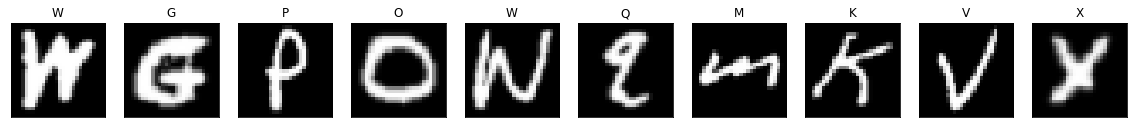

In [8]:
fig = plt.figure(figsize=(20,20))
for i in range(10):
    letter = fig.add_subplot(1, 10, i+1, xticks=[], yticks=[])
    letter.imshow(X_train[i], cmap='gray')
    letter.set_title(get_label(Y_train[i]))

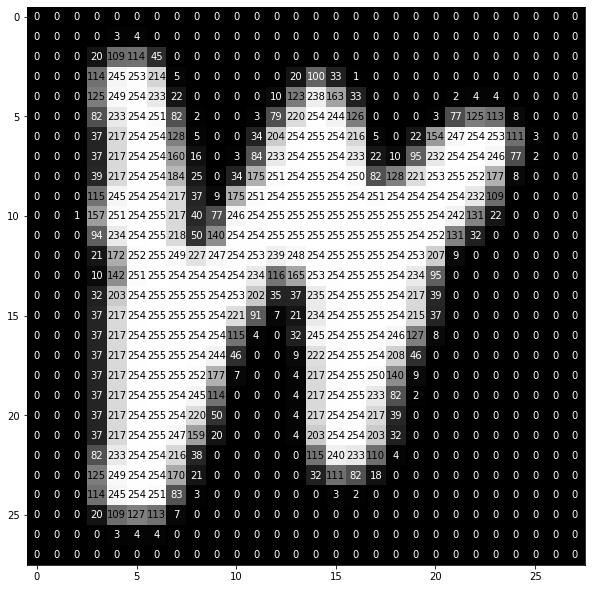

In [9]:
def img_pixel_details(img, letter):
    letter.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            letter.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (10,20)) 
letter = fig.add_subplot(111)
img_pixel_details(X_train[0], letter)

## **Image Rescaling**

In [10]:
X_train = X_train/255.0
X_test = X_test/255.0

## **One-Hot-Encoding** 

In [11]:
print('Integer-valued label of sample data:',Y_train[0])
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
print('One-hot label of sample data:')
Y_train[0]

Integer-valued label of sample data: 23
One-hot label of sample data:


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# **Weights and Biases**

Developer tools for machine learning
Build better models faster with experiment tracking, dataset versioning, and model management

In [12]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
from wandb.keras import WandbCallback
import random

for run in range(20):
  wandb.init(
      project="EMNIST_0",
      entity="anandkarunan",
      config={
          "layer_1": 512,
          "activation_1": "relu",
          "dropout": random.uniform(0.01, 0.40),
          "layer_2": 512,
          "activation_2": "relu",
          "layer_3": 27,
          "activation_3": "softmax",
          "optimizer": "rmsprop",
          "loss": "categorical_crossentropy",
          "metric": "accuracy",
          "epoch": 10,
          "batch_size": 128
      })
  config = wandb.config

  model = tf.keras.models.Sequential([
      tf.keras.layers.Flatten(input_shape=(X_train.shape[1:])),
      tf.keras.layers.Dense(config.layer_1, activation=config.activation_1),
      tf.keras.layers.Dropout(config.dropout),
      tf.keras.layers.Dense(config.layer_2, activation=config.activation_2),
      tf.keras.layers.Dropout(config.dropout),
      tf.keras.layers.Dense(config.layer_3, activation=config.activation_3)
      ])

  model.compile(optimizer=config.optimizer,
                loss=config.loss,
                metrics=[config.metric]
                )

  history = model.fit(x=X_train,
                      y=Y_train,
                      epochs=config.epoch,
                      batch_size=config.batch_size,
                      validation_split=0.2,
                      callbacks=[WandbCallback()]
                      )

  wandb.finish()

Epoch 1/10
780/780 [==============================] - 6s 6ms/step - loss: 0.8319 - accuracy: 0.7463 - val_loss: 0.4560 - val_accuracy: 0.8558
Epoch 2/10
780/780 [==============================] - 4s 5ms/step - loss: 0.4733 - accuracy: 0.8513 - val_loss: 0.3676 - val_accuracy: 0.8869
Epoch 3/10
780/780 [==============================] - 4s 5ms/step - loss: 0.4066 - accuracy: 0.8726 - val_loss: 0.3272 - val_accuracy: 0.8966
Epoch 4/10
780/780 [==============================] - 4s 5ms/step - loss: 0.3784 - accuracy: 0.8811 - val_loss: 0.3043 - val_accuracy: 0.9041
Epoch 5/10
780/780 [==============================] - 4s 5ms/step - loss: 0.3612 - accuracy: 0.8886 - val_loss: 0.3098 - val_accuracy: 0.9094
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3533 - accuracy: 0.8908 - val_loss: 0.3074 - val_accuracy: 0.9095
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3505 - accuracy: 0.8924 - val_loss: 0.3043 - val_accuracy: 0.9129
Epoch 

epoch,9
loss,0.3569
accuracy,0.8952
val_loss,0.31718
val_accuracy,0.91322
_runtime,51
_timestamp,1626174576
_step,9
best_val_loss,0.30429
best_epoch,6


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▁▁▁▁▁▁▁
accuracy,▁▆▇▇██████
val_loss,█▄▂▁▁▁▁▁▁▂
val_accuracy,▁▅▆▇██████
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 5s 6ms/step - loss: 0.8428 - accuracy: 0.7436 - val_loss: 0.4347 - val_accuracy: 0.8665
Epoch 2/10
780/780 [==============================] - 4s 6ms/step - loss: 0.4801 - accuracy: 0.8505 - val_loss: 0.3556 - val_accuracy: 0.8867
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.4181 - accuracy: 0.8680 - val_loss: 0.3185 - val_accuracy: 0.9006
Epoch 4/10
780/780 [==============================] - 4s 5ms/step - loss: 0.3827 - accuracy: 0.8801 - val_loss: 0.3137 - val_accuracy: 0.9022
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3667 - accuracy: 0.8860 - val_loss: 0.3067 - val_accuracy: 0.9088
Epoch 6/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3595 - accuracy: 0.8900 - val_loss: 0.3186 - val_accuracy: 0.9088
Epoch 7/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3568 - accuracy: 0.8921 - val_loss: 0.3157 - val_accuracy: 0.9069
Epoch 

epoch,9
loss,0.35804
accuracy,0.89502
val_loss,0.31972
val_accuracy,0.91162
_runtime,50
_timestamp,1626174633
_step,9
best_val_loss,0.3067
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▁▁▁▁▁▁▁
accuracy,▁▆▇▇██████
val_loss,█▄▂▁▁▂▁▂▂▂
val_accuracy,▁▄▆▆▇▇▇███
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 5s 6ms/step - loss: 0.7456 - accuracy: 0.7717 - val_loss: 0.4004 - val_accuracy: 0.8775
Epoch 2/10
780/780 [==============================] - 4s 6ms/step - loss: 0.4077 - accuracy: 0.8706 - val_loss: 0.3359 - val_accuracy: 0.8911
Epoch 3/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3422 - accuracy: 0.8901 - val_loss: 0.2937 - val_accuracy: 0.9099
Epoch 4/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3084 - accuracy: 0.9009 - val_loss: 0.2970 - val_accuracy: 0.9101
Epoch 5/10
780/780 [==============================] - 4s 5ms/step - loss: 0.2917 - accuracy: 0.9063 - val_loss: 0.2933 - val_accuracy: 0.9107
Epoch 6/10
780/780 [==============================] - 4s 5ms/step - loss: 0.2794 - accuracy: 0.9107 - val_loss: 0.3095 - val_accuracy: 0.9137
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2739 - accuracy: 0.9119 - val_loss: 0.3051 - val_accuracy: 0.9136
Epoch 

epoch,9
loss,0.26168
accuracy,0.91793
val_loss,0.31717
val_accuracy,0.91482
_runtime,50
_timestamp,1626174691
_step,9
best_val_loss,0.29328
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▄▁▁▁▂▂▄▃▃
val_accuracy,▁▄▇▇▇█████
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 5s 6ms/step - loss: 0.7469 - accuracy: 0.7706 - val_loss: 0.3999 - val_accuracy: 0.8739
Epoch 2/10
780/780 [==============================] - 4s 6ms/step - loss: 0.4131 - accuracy: 0.8680 - val_loss: 0.3429 - val_accuracy: 0.8923
Epoch 3/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3442 - accuracy: 0.8886 - val_loss: 0.3060 - val_accuracy: 0.9038
Epoch 4/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3132 - accuracy: 0.8991 - val_loss: 0.3045 - val_accuracy: 0.9062
Epoch 5/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2956 - accuracy: 0.9040 - val_loss: 0.2941 - val_accuracy: 0.9128
Epoch 6/10
780/780 [==============================] - 4s 5ms/step - loss: 0.2820 - accuracy: 0.9092 - val_loss: 0.3038 - val_accuracy: 0.9145
Epoch 7/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2773 - accuracy: 0.9123 - val_loss: 0.3081 - val_accuracy: 0.9131
Epoch 

epoch,9
loss,0.26707
accuracy,0.91636
val_loss,0.32532
val_accuracy,0.91707
_runtime,49
_timestamp,1626174785
_step,9
best_val_loss,0.29406
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▄▂▂▁▂▂▂▂▃
val_accuracy,▁▄▆▆▇█▇▇▇█
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 6s 6ms/step - loss: 0.7605 - accuracy: 0.7670 - val_loss: 0.4218 - val_accuracy: 0.8668
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.4204 - accuracy: 0.8663 - val_loss: 0.3352 - val_accuracy: 0.8919
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3527 - accuracy: 0.8875 - val_loss: 0.3177 - val_accuracy: 0.9016
Epoch 4/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3216 - accuracy: 0.8975 - val_loss: 0.3100 - val_accuracy: 0.9028
Epoch 5/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3088 - accuracy: 0.9004 - val_loss: 0.3040 - val_accuracy: 0.9086
Epoch 6/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2977 - accuracy: 0.9050 - val_loss: 0.2918 - val_accuracy: 0.9129
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2904 - accuracy: 0.9090 - val_loss: 0.2993 - val_accuracy: 0.9113
Epoch 

epoch,9
loss,0.28455
accuracy,0.91198
val_loss,0.32842
val_accuracy,0.91647
_runtime,51
_timestamp,1626174845
_step,9
best_val_loss,0.28908
best_epoch,7


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▃▃▂▂▁▂▁▂▃
val_accuracy,▁▅▆▆▇█▇███
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 5s 6ms/step - loss: 0.6598 - accuracy: 0.7962 - val_loss: 0.3917 - val_accuracy: 0.8750
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3408 - accuracy: 0.8896 - val_loss: 0.3346 - val_accuracy: 0.8934
Epoch 3/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2759 - accuracy: 0.9093 - val_loss: 0.3050 - val_accuracy: 0.9067
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2392 - accuracy: 0.9195 - val_loss: 0.2939 - val_accuracy: 0.9076
Epoch 5/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2153 - accuracy: 0.9270 - val_loss: 0.2946 - val_accuracy: 0.9140
Epoch 6/10
780/780 [==============================] - 4s 6ms/step - loss: 0.1998 - accuracy: 0.9321 - val_loss: 0.2997 - val_accuracy: 0.9143
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.1890 - accuracy: 0.9355 - val_loss: 0.3009 - val_accuracy: 0.9160
Epoch 

epoch,9
loss,0.16907
accuracy,0.9421
val_loss,0.35516
val_accuracy,0.91346
_runtime,51
_timestamp,1626174904
_step,9
best_val_loss,0.29395
best_epoch,3


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▁▁▁▁▁
accuracy,▁▅▆▇▇█████
val_loss,█▄▂▁▁▁▁▄▅▅
val_accuracy,▁▄▆▇██████
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 5s 6ms/step - loss: 0.6437 - accuracy: 0.8024 - val_loss: 0.4011 - val_accuracy: 0.8710
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3294 - accuracy: 0.8928 - val_loss: 0.3404 - val_accuracy: 0.8919
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2632 - accuracy: 0.9127 - val_loss: 0.3056 - val_accuracy: 0.9046
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2242 - accuracy: 0.9233 - val_loss: 0.2976 - val_accuracy: 0.9098
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.1984 - accuracy: 0.9314 - val_loss: 0.3168 - val_accuracy: 0.9109
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.1803 - accuracy: 0.9376 - val_loss: 0.3310 - val_accuracy: 0.9141
Epoch 7/10
780/780 [==============================] - 4s 6ms/step - loss: 0.1674 - accuracy: 0.9414 - val_loss: 0.3390 - val_accuracy: 0.9105
Epoch 

epoch,9
loss,0.14112
accuracy,0.94987
val_loss,0.39392
val_accuracy,0.91054
_runtime,52
_timestamp,1626175000
_step,9
best_val_loss,0.29763
best_epoch,3


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▄▃▂▂▂▁▁▁▁
accuracy,▁▅▆▇▇▇████
val_loss,█▄▂▁▂▃▄▅▆█
val_accuracy,▁▄▆▇▇█▇██▇
_runtime,▁▂▃▃▄▅▆▇▇█
_timestamp,▁▂▃▃▄▅▆▇▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 5s 6ms/step - loss: 0.7730 - accuracy: 0.7641 - val_loss: 0.4062 - val_accuracy: 0.8741
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.4330 - accuracy: 0.8634 - val_loss: 0.3401 - val_accuracy: 0.8944
Epoch 3/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3663 - accuracy: 0.8840 - val_loss: 0.3119 - val_accuracy: 0.9028
Epoch 4/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3351 - accuracy: 0.8932 - val_loss: 0.3005 - val_accuracy: 0.9054
Epoch 5/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3200 - accuracy: 0.8981 - val_loss: 0.2943 - val_accuracy: 0.9113
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3050 - accuracy: 0.9036 - val_loss: 0.3010 - val_accuracy: 0.9123
Epoch 7/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2999 - accuracy: 0.9054 - val_loss: 0.3015 - val_accuracy: 0.9127
Epoch 

epoch,9
loss,0.2971
accuracy,0.91073
val_loss,0.31827
val_accuracy,0.9153
_runtime,52
_timestamp,1626175096
_step,9
best_val_loss,0.29435
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▄▂▁▁▁▁▂▃▂
val_accuracy,▁▄▆▆▇▇████
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 5s 6ms/step - loss: 0.6750 - accuracy: 0.7926 - val_loss: 0.3962 - val_accuracy: 0.8778
Epoch 2/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3549 - accuracy: 0.8861 - val_loss: 0.3152 - val_accuracy: 0.8975
Epoch 3/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2880 - accuracy: 0.9054 - val_loss: 0.3088 - val_accuracy: 0.9007
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2521 - accuracy: 0.9150 - val_loss: 0.2953 - val_accuracy: 0.9085
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2305 - accuracy: 0.9222 - val_loss: 0.3037 - val_accuracy: 0.9093
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2142 - accuracy: 0.9283 - val_loss: 0.2888 - val_accuracy: 0.9146
Epoch 7/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2039 - accuracy: 0.9311 - val_loss: 0.3074 - val_accuracy: 0.9136
Epoch 

epoch,9
loss,0.1843
accuracy,0.93732
val_loss,0.34507
val_accuracy,0.91839
_runtime,52
_timestamp,1626175156
_step,9
best_val_loss,0.28882
best_epoch,5


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
accuracy,▁▆▆▇▇█████
val_loss,█▃▂▁▂▁▂▄▃▅
val_accuracy,▁▄▅▆▆▇▇▇██
_runtime,▁▂▃▃▄▅▆▇▇█
_timestamp,▁▂▃▃▄▅▆▇▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 6s 6ms/step - loss: 0.7169 - accuracy: 0.7807 - val_loss: 0.4155 - val_accuracy: 0.8706
Epoch 2/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3887 - accuracy: 0.8759 - val_loss: 0.3300 - val_accuracy: 0.8971
Epoch 3/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3210 - accuracy: 0.8947 - val_loss: 0.3058 - val_accuracy: 0.9039
Epoch 4/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2854 - accuracy: 0.9068 - val_loss: 0.3021 - val_accuracy: 0.9095
Epoch 5/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2683 - accuracy: 0.9117 - val_loss: 0.2883 - val_accuracy: 0.9143
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2555 - accuracy: 0.9153 - val_loss: 0.3026 - val_accuracy: 0.9149
Epoch 7/10
780/780 [==============================] - 4s 6ms/step - loss: 0.2471 - accuracy: 0.9196 - val_loss: 0.3109 - val_accuracy: 0.9149
Epoch 

epoch,9
loss,0.2369
accuracy,0.92497
val_loss,0.32877
val_accuracy,0.91258
_runtime,52
_timestamp,1626175217
_step,9
best_val_loss,0.28834
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▃▂▂▁▂▂▂▃▃
val_accuracy,▁▅▆▇█████▇
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 6s 6ms/step - loss: 0.7981 - accuracy: 0.7566 - val_loss: 0.4339 - val_accuracy: 0.8677
Epoch 2/10
780/780 [==============================] - 4s 6ms/step - loss: 0.4517 - accuracy: 0.8576 - val_loss: 0.3508 - val_accuracy: 0.8921
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3859 - accuracy: 0.8792 - val_loss: 0.3188 - val_accuracy: 0.9004
Epoch 4/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3579 - accuracy: 0.8873 - val_loss: 0.3161 - val_accuracy: 0.9036
Epoch 5/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3371 - accuracy: 0.8931 - val_loss: 0.3078 - val_accuracy: 0.9085
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3261 - accuracy: 0.8966 - val_loss: 0.2995 - val_accuracy: 0.9111
Epoch 7/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3261 - accuracy: 0.8995 - val_loss: 0.3058 - val_accuracy: 0.9108
Epoch 

epoch,9
loss,0.32004
accuracy,0.90382
val_loss,0.33182
val_accuracy,0.91278
_runtime,52
_timestamp,1626175278
_step,9
best_val_loss,0.29954
best_epoch,5


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▄▂▂▁▁▁▂▁▃
val_accuracy,▁▅▆▆▇█████
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 6s 7ms/step - loss: 0.8505 - accuracy: 0.7404 - val_loss: 0.4388 - val_accuracy: 0.8636
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.4930 - accuracy: 0.8457 - val_loss: 0.3524 - val_accuracy: 0.8887
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.4233 - accuracy: 0.8671 - val_loss: 0.3333 - val_accuracy: 0.8978
Epoch 4/10
780/780 [==============================] - 4s 6ms/step - loss: 0.3932 - accuracy: 0.8768 - val_loss: 0.3111 - val_accuracy: 0.9058
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3787 - accuracy: 0.8826 - val_loss: 0.3079 - val_accuracy: 0.9090
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3695 - accuracy: 0.8865 - val_loss: 0.3202 - val_accuracy: 0.9065
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3695 - accuracy: 0.8872 - val_loss: 0.3175 - val_accuracy: 0.9047
Epoch 

epoch,9
loss,0.3724
accuracy,0.89109
val_loss,0.32052
val_accuracy,0.91282
_runtime,54
_timestamp,1626175376
_step,9
best_val_loss,0.30788
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▁▁▁▁▁▁▁
accuracy,▁▆▇▇██████
val_loss,█▃▂▁▁▂▂▁▂▂
val_accuracy,▁▅▆▇▇▇▇███
_runtime,▁▂▃▃▄▅▆▇▇█
_timestamp,▁▂▃▃▄▅▆▇▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 6s 6ms/step - loss: 0.6628 - accuracy: 0.7965 - val_loss: 0.3752 - val_accuracy: 0.8831
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3422 - accuracy: 0.8892 - val_loss: 0.3307 - val_accuracy: 0.8962
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2765 - accuracy: 0.9078 - val_loss: 0.3230 - val_accuracy: 0.9021
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2393 - accuracy: 0.9195 - val_loss: 0.2930 - val_accuracy: 0.9134
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2176 - accuracy: 0.9265 - val_loss: 0.2901 - val_accuracy: 0.9114
Epoch 6/10
780/780 [==============================] - 4s 6ms/step - loss: 0.1983 - accuracy: 0.9323 - val_loss: 0.3132 - val_accuracy: 0.9132
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.1855 - accuracy: 0.9348 - val_loss: 0.3191 - val_accuracy: 0.9138
Epoch 

epoch,9
loss,0.16645
accuracy,0.94203
val_loss,0.34577
val_accuracy,0.91659
_runtime,53
_timestamp,1626175472
_step,9
best_val_loss,0.29009
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▃▂▂▁▁▁▁▁
accuracy,▁▅▆▇▇█████
val_loss,█▄▄▁▁▃▃▄▇▆
val_accuracy,▁▄▅▇▇▇▇███
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 6s 6ms/step - loss: 0.7693 - accuracy: 0.7646 - val_loss: 0.4020 - val_accuracy: 0.8733
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.4316 - accuracy: 0.8639 - val_loss: 0.3490 - val_accuracy: 0.8918
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3675 - accuracy: 0.8816 - val_loss: 0.3207 - val_accuracy: 0.9023
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3310 - accuracy: 0.8935 - val_loss: 0.2965 - val_accuracy: 0.9110
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3187 - accuracy: 0.8987 - val_loss: 0.3042 - val_accuracy: 0.9105
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3088 - accuracy: 0.9022 - val_loss: 0.3003 - val_accuracy: 0.9135
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3027 - accuracy: 0.9046 - val_loss: 0.3020 - val_accuracy: 0.9145
Epoch 

epoch,9
loss,0.29112
accuracy,0.91091
val_loss,0.31307
val_accuracy,0.91302
_runtime,53
_timestamp,1626175534
_step,9
best_val_loss,0.29654
best_epoch,3


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▄▃▁▂▁▁▁▃▂
val_accuracy,▁▄▆▇▇█████
_runtime,▁▂▃▃▄▅▆▇▇█
_timestamp,▁▂▃▃▄▅▆▇▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 6s 7ms/step - loss: 0.7813 - accuracy: 0.7621 - val_loss: 0.4093 - val_accuracy: 0.8754
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.4369 - accuracy: 0.8612 - val_loss: 0.3445 - val_accuracy: 0.8945
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3702 - accuracy: 0.8826 - val_loss: 0.3111 - val_accuracy: 0.9039
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3409 - accuracy: 0.8907 - val_loss: 0.3088 - val_accuracy: 0.9044
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3222 - accuracy: 0.8976 - val_loss: 0.3053 - val_accuracy: 0.9048
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3141 - accuracy: 0.9004 - val_loss: 0.3160 - val_accuracy: 0.9097
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3087 - accuracy: 0.9028 - val_loss: 0.3118 - val_accuracy: 0.9137
Epoch 

epoch,9
loss,0.30232
accuracy,0.90816
val_loss,0.33477
val_accuracy,0.91234
_runtime,54
_timestamp,1626175631
_step,9
best_val_loss,0.30527
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▄▁▁▁▂▁▁▁▃
val_accuracy,▁▄▆▆▆▇███▇
_runtime,▁▂▃▃▄▅▆▇▇█
_timestamp,▁▂▃▃▄▅▆▇▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 5s 6ms/step - loss: 0.7385 - accuracy: 0.7740 - val_loss: 0.4224 - val_accuracy: 0.8681
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.4040 - accuracy: 0.8713 - val_loss: 0.3309 - val_accuracy: 0.8948
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3375 - accuracy: 0.8899 - val_loss: 0.3136 - val_accuracy: 0.9042
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3057 - accuracy: 0.9014 - val_loss: 0.2945 - val_accuracy: 0.9099
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2838 - accuracy: 0.9068 - val_loss: 0.2887 - val_accuracy: 0.9137
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2769 - accuracy: 0.9109 - val_loss: 0.2916 - val_accuracy: 0.9128
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2670 - accuracy: 0.9147 - val_loss: 0.3039 - val_accuracy: 0.9139
Epoch 

epoch,9
loss,0.26169
accuracy,0.91782
val_loss,0.32013
val_accuracy,0.91426
_runtime,55
_timestamp,1626175729
_step,9
best_val_loss,0.28867
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▃▂▁▁▁▂▂▂▃
val_accuracy,▁▅▆▇██████
_runtime,▁▂▂▃▄▅▆▆▇█
_timestamp,▁▂▂▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 6s 7ms/step - loss: 0.7245 - accuracy: 0.7785 - val_loss: 0.3959 - val_accuracy: 0.8749
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3914 - accuracy: 0.8759 - val_loss: 0.3178 - val_accuracy: 0.8992
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3246 - accuracy: 0.8947 - val_loss: 0.3159 - val_accuracy: 0.9023
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2902 - accuracy: 0.9056 - val_loss: 0.2940 - val_accuracy: 0.9054
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2691 - accuracy: 0.9119 - val_loss: 0.2935 - val_accuracy: 0.9130
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2597 - accuracy: 0.9153 - val_loss: 0.2944 - val_accuracy: 0.9125
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2508 - accuracy: 0.9188 - val_loss: 0.3049 - val_accuracy: 0.9159
Epoch 

epoch,9
loss,0.23678
accuracy,0.92413
val_loss,0.32778
val_accuracy,0.91603
_runtime,55
_timestamp,1626175794
_step,9
best_val_loss,0.29352
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▃▃▁▁▁▂▂▃▃
val_accuracy,▁▅▆▆▇▇████
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 6s 7ms/step - loss: 0.6743 - accuracy: 0.7916 - val_loss: 0.3848 - val_accuracy: 0.8789
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3541 - accuracy: 0.8859 - val_loss: 0.3325 - val_accuracy: 0.8968
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2886 - accuracy: 0.9040 - val_loss: 0.3203 - val_accuracy: 0.8984
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2538 - accuracy: 0.9157 - val_loss: 0.3005 - val_accuracy: 0.9099
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2341 - accuracy: 0.9220 - val_loss: 0.2952 - val_accuracy: 0.9088
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2185 - accuracy: 0.9259 - val_loss: 0.3113 - val_accuracy: 0.9152
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2066 - accuracy: 0.9310 - val_loss: 0.3221 - val_accuracy: 0.9152
Epoch 

epoch,9
loss,0.1887
accuracy,0.93695
val_loss,0.36526
val_accuracy,0.9125
_runtime,55
_timestamp,1626175892
_step,9
best_val_loss,0.2952
best_epoch,4


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▂▁▁▁▁▁
accuracy,▁▆▆▇▇▇████
val_loss,█▄▃▁▁▂▃▄▆▆
val_accuracy,▁▄▅▇▇██▇▇▇
_runtime,▁▂▂▃▄▅▆▆▇█
_timestamp,▁▂▂▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 6s 7ms/step - loss: 0.7305 - accuracy: 0.7761 - val_loss: 0.3932 - val_accuracy: 0.8782
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3969 - accuracy: 0.8739 - val_loss: 0.3370 - val_accuracy: 0.8929
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3316 - accuracy: 0.8937 - val_loss: 0.3045 - val_accuracy: 0.9042
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2980 - accuracy: 0.9031 - val_loss: 0.2937 - val_accuracy: 0.9100
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2787 - accuracy: 0.9094 - val_loss: 0.3096 - val_accuracy: 0.9103
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2686 - accuracy: 0.9131 - val_loss: 0.2985 - val_accuracy: 0.9137
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.2590 - accuracy: 0.9167 - val_loss: 0.2884 - val_accuracy: 0.9151
Epoch 

epoch,9
loss,0.24795
accuracy,0.92089
val_loss,0.31876
val_accuracy,0.91639
_runtime,57
_timestamp,1626175959
_step,9
best_val_loss,0.28843
best_epoch,6


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▂▁▁▁▁▁▁
accuracy,▁▆▇▇▇█████
val_loss,█▄▂▁▂▂▁▂▂▃
val_accuracy,▁▄▆▇▇▇████
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


Epoch 1/10
780/780 [==============================] - 5s 6ms/step - loss: 0.8705 - accuracy: 0.7356 - val_loss: 0.4341 - val_accuracy: 0.8686
Epoch 2/10
780/780 [==============================] - 5s 6ms/step - loss: 0.5023 - accuracy: 0.8431 - val_loss: 0.3588 - val_accuracy: 0.8881
Epoch 3/10
780/780 [==============================] - 5s 6ms/step - loss: 0.4343 - accuracy: 0.8650 - val_loss: 0.3281 - val_accuracy: 0.8964
Epoch 4/10
780/780 [==============================] - 5s 6ms/step - loss: 0.4034 - accuracy: 0.8749 - val_loss: 0.3211 - val_accuracy: 0.9021
Epoch 5/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3888 - accuracy: 0.8808 - val_loss: 0.3112 - val_accuracy: 0.9044
Epoch 6/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3831 - accuracy: 0.8841 - val_loss: 0.3211 - val_accuracy: 0.9066
Epoch 7/10
780/780 [==============================] - 5s 6ms/step - loss: 0.3761 - accuracy: 0.8854 - val_loss: 0.3115 - val_accuracy: 0.9103
Epoch 

epoch,9
loss,0.38682
accuracy,0.88632
val_loss,0.32158
val_accuracy,0.91014
_runtime,56
_timestamp,1626176057
_step,9
best_val_loss,0.30737
best_epoch,7


epoch,▁▂▃▃▄▅▆▆▇█
loss,█▃▂▁▁▁▁▁▁▁
accuracy,▁▆▇▇██████
val_loss,█▄▂▂▁▂▁▁▁▂
val_accuracy,▁▄▆▆▇▇████
_runtime,▁▂▃▃▄▅▆▆▇█
_timestamp,▁▂▃▃▄▅▆▆▇█
_step,▁▂▃▃▄▅▆▆▇█


# **Testing Accuracy after training the model**

In [13]:
z = model.evaluate(X_test, Y_test, verbose=1)
accuracy = 100*z[1]

print('Test accuracy after training: %.2f%%' % accuracy)

650/650 [==============================] - 2s 3ms/step - loss: 0.3214 - accuracy: 0.9105
Test accuracy after training: 91.05%


In [15]:
accuracy_plot = plt.imread('/content/drive/MyDrive/Program/EMNIST/Accuracy.png')
loss_plot = plt.imread('/content/drive/MyDrive/Program/EMNIST/Loss.png')

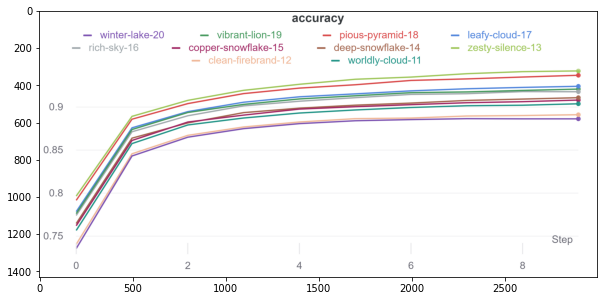

In [22]:
fig = plt.figure(figsize=(10,20))
plt.imshow(accuracy_plot)

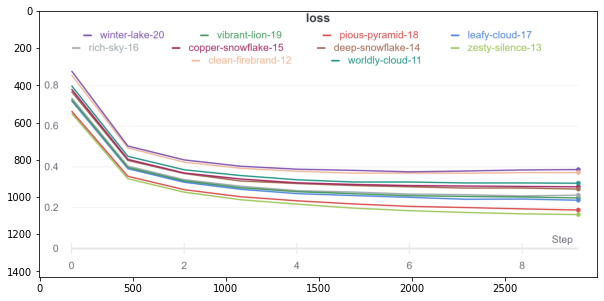

In [28]:
fig = plt.figure(figsize=(10,20))
plt.imshow(loss_plot)

# **Predicting Alphabets**

In [49]:
import tensorflow as tf
from keras_preprocessing import image

def get_pred(img_sample):
  images = image.load_img(img_sample, target_size=(28, 28))    
  x = image.img_to_array(images)
  x = tf.image.rgb_to_grayscale(x)
  x = np.expand_dims(x, axis=0)
  x = x/255.0
  
  pred = model.predict(x)
  n=0
  max=0
  for i in range(len(pred[0])):
    if pred[0][i]>max:
      n=i
      max=pred[0][i]
  prediction = get_label(n)
  print ("Predicted alphabet:",prediction)

 **Sample Input 1 - A**

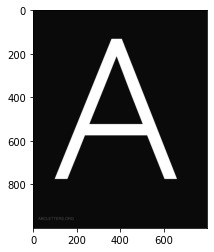

In [50]:
test=plt.imread('/content/drive/MyDrive/Program/EMNIST/A_EMNIST.jpg')
plt.imshow(test,cmap='gray')

In [51]:
get_pred('/content/drive/MyDrive/Program/EMNIST/A_EMNIST.jpg')

Predicted alphabet: A


 **Sample Input 2 - M**

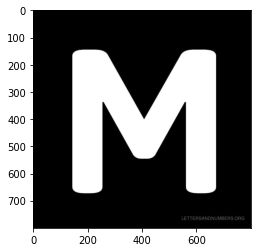

In [52]:
test=plt.imread('/content/drive/MyDrive/Program/EMNIST/M-EMNIST.jpg')
plt.imshow(test,cmap='gray')

In [53]:
get_pred('/content/drive/MyDrive/Program/EMNIST/M-EMNIST.jpg')

Predicted alphabet: M
